In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import klib as klb
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,StandardScaler,RobustScaler
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor,RandomForestRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
import warnings
warnings.filterwarnings('ignore')
from sklearn.neighbors import KNeighborsRegressor

In [2]:
df=pd.read_csv('insurance.csv')

In [3]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.smoker.unique()

array(['yes', 'no'], dtype=object)

In [5]:
df.region.unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [6]:
le=LabelEncoder()

In [7]:
df['smoker']=le.fit_transform(df['smoker'])

In [8]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,southwest,16884.92400
1,18,male,33.770,1,0,southeast,1725.55230
2,28,male,33.000,3,0,southeast,4449.46200
3,33,male,22.705,0,0,northwest,21984.47061
4,32,male,28.880,0,0,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,northwest,10600.54830
1334,18,female,31.920,0,0,northeast,2205.98080
1335,18,female,36.850,0,0,southeast,1629.83350
1336,21,female,25.800,0,0,southwest,2007.94500


In [9]:
df['region']=le.fit_transform(df['region'])

In [10]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,1,3,16884.92400
1,18,male,33.770,1,0,2,1725.55230
2,28,male,33.000,3,0,2,4449.46200
3,33,male,22.705,0,0,1,21984.47061
4,32,male,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,0,1,10600.54830
1334,18,female,31.920,0,0,0,2205.98080
1335,18,female,36.850,0,0,2,1629.83350
1336,21,female,25.800,0,0,3,2007.94500


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(2), int64(2), object(1)
memory usage: 62.8+ KB


In [12]:
df.sex.unique()

array(['female', 'male'], dtype=object)

In [13]:
df['sex']=le.fit_transform(df['sex'])

In [14]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,0,27.900,0,1,3,16884.92400
1,18,1,33.770,1,0,2,1725.55230
2,28,1,33.000,3,0,2,4449.46200
3,33,1,22.705,0,0,1,21984.47061
4,32,1,28.880,0,0,1,3866.85520
...,...,...,...,...,...,...,...
1333,50,1,30.970,3,0,1,10600.54830
1334,18,0,31.920,0,0,0,2205.98080
1335,18,0,36.850,0,0,2,1629.83350
1336,21,0,25.800,0,0,3,2007.94500


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   int32  
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   int32  
 5   region    1338 non-null   int32  
 6   charges   1338 non-null   float64
dtypes: float64(2), int32(3), int64(2)
memory usage: 57.6 KB


In [16]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

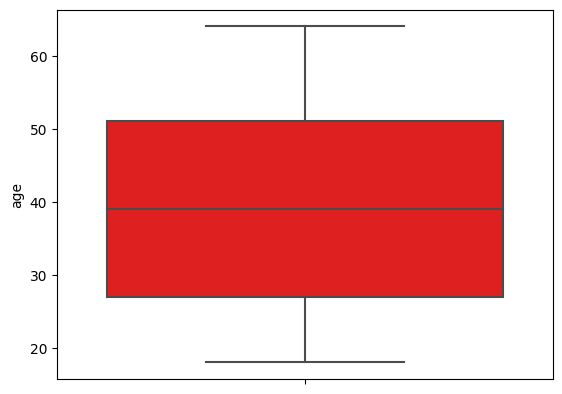

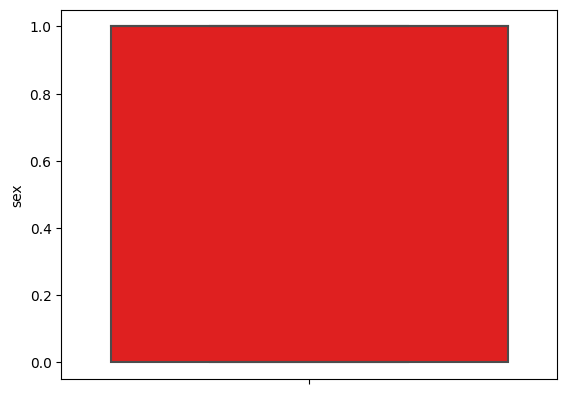

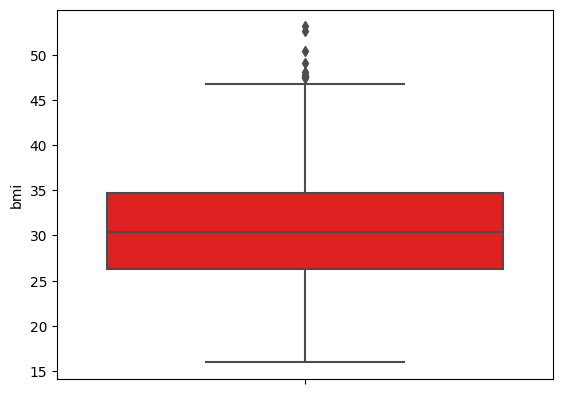

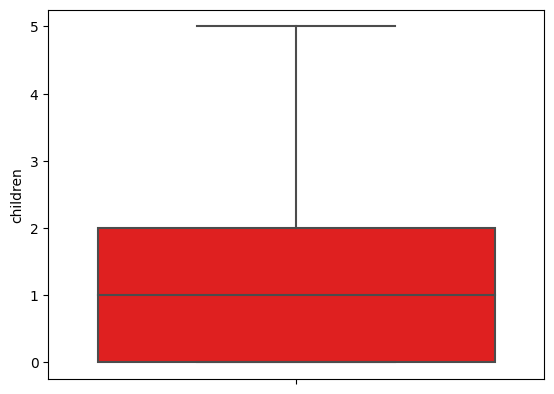

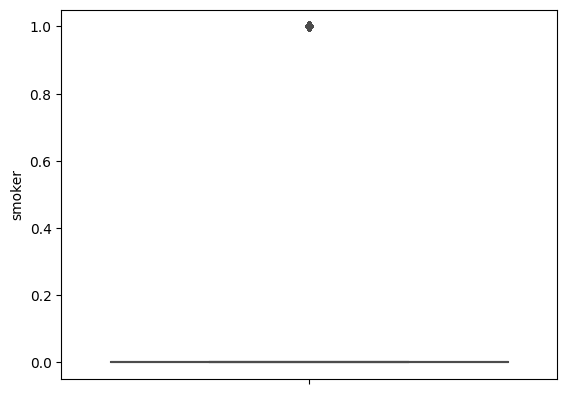

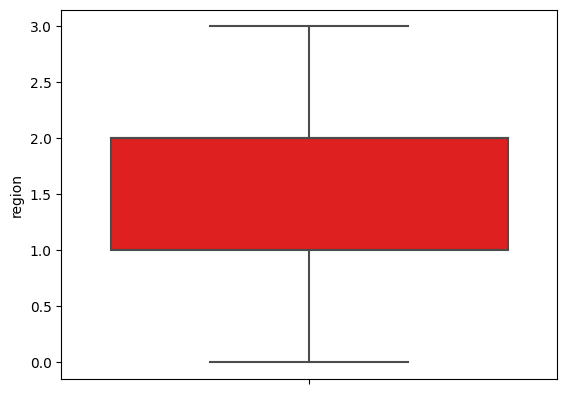

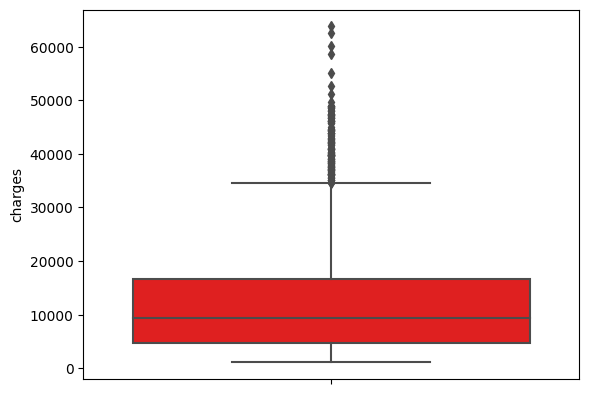

In [17]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='red')
        plt.show()

In [18]:
def outlier_limit(col):
    Q3,Q1=np.nanpercentile(col,[75,25])
    IQR=Q3-Q1
    UL=Q3+1.5*IQR
    LL=Q1-1.5*Q1
    return UL,LL

In [19]:
for column in df.columns:
    if df[column].dtype!='object':
        UL,LL=outlier_limit(df[column])
        df[column]=np.where((df[column]>UL)|(df[column]<LL),np.nan,df[column])

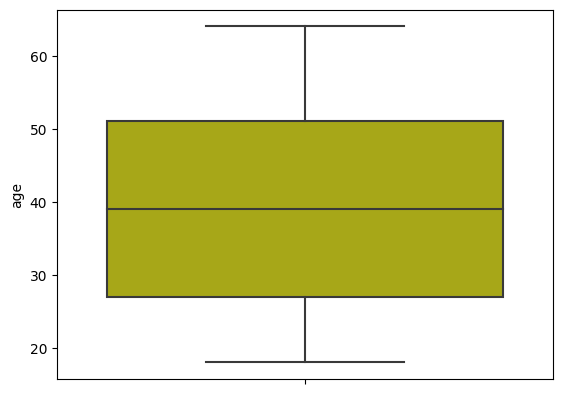

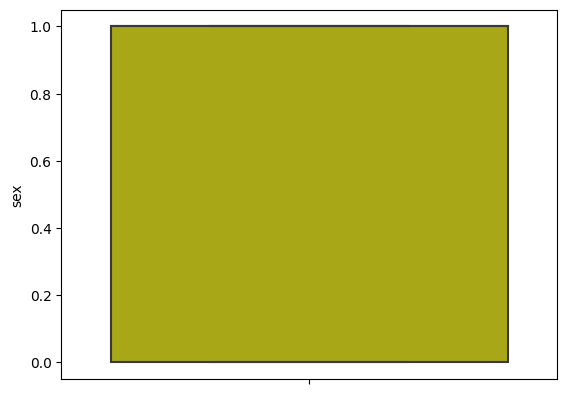

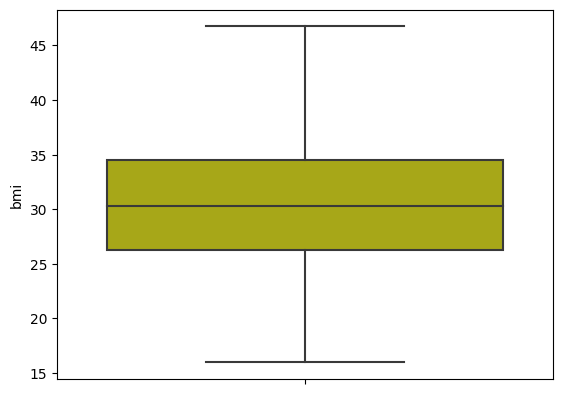

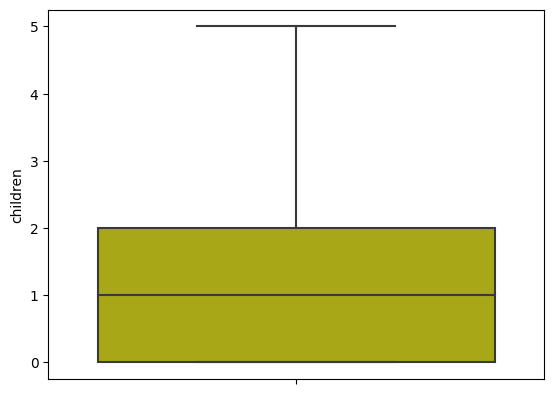

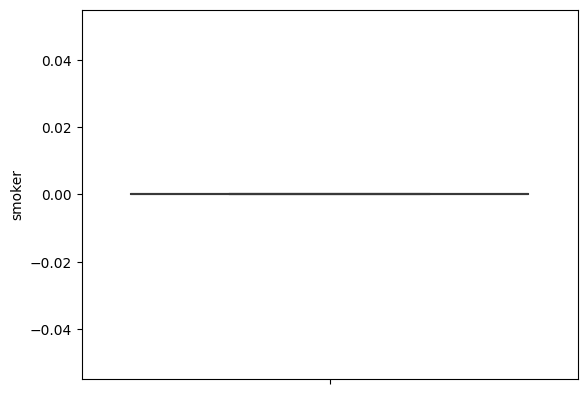

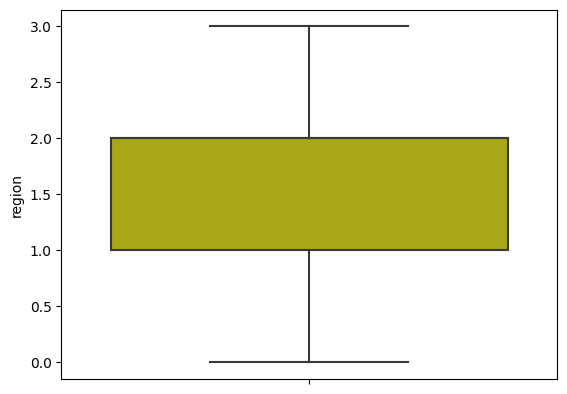

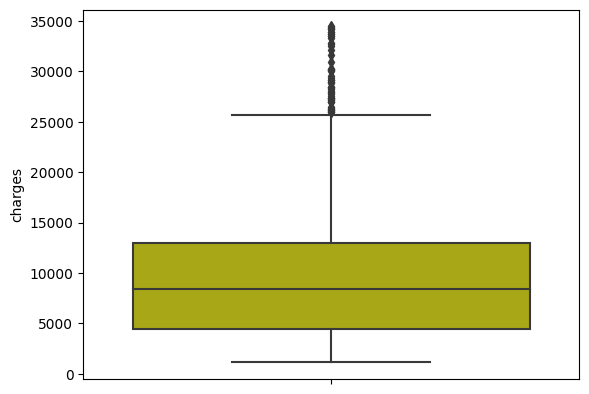

In [20]:
for i in df.columns:
    if df[i].dtype!='object':
        sns.boxplot(y=df[i],color='y')
        plt.show()

In [21]:
df.isnull().sum()

age           0
sex           0
bmi           9
children      0
smoker      274
region        0
charges     139
dtype: int64

In [22]:
df.isnull().mean()*100

age          0.000000
sex          0.000000
bmi          0.672646
children     0.000000
smoker      20.478326
region       0.000000
charges     10.388640
dtype: float64

In [23]:
df.fillna(df.mean(),inplace=True)

In [24]:
df

,age,sex,bmi,children,smoker,region,charges
0,19.0,0.0,27.900,0.0,0.0,3.0,16884.92400
1,18.0,1.0,33.770,1.0,0.0,2.0,1725.55230
2,28.0,1.0,33.000,3.0,0.0,2.0,4449.46200
3,33.0,1.0,22.705,0.0,0.0,1.0,21984.47061
4,32.0,1.0,28.880,0.0,0.0,1.0,3866.85520
...,...,...,...,...,...,...,...
1333,50.0,1.0,30.970,3.0,0.0,1.0,10600.54830
1334,18.0,0.0,31.920,0.0,0.0,0.0,2205.98080
1335,18.0,0.0,36.850,0.0,0.0,2.0,1629.83350
1336,21.0,0.0,25.800,0.0,0.0,3.0,2007.94500


In [25]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [26]:
df.size

9366

In [27]:
df.shape

(1338, 7)

<AxesSubplot: >

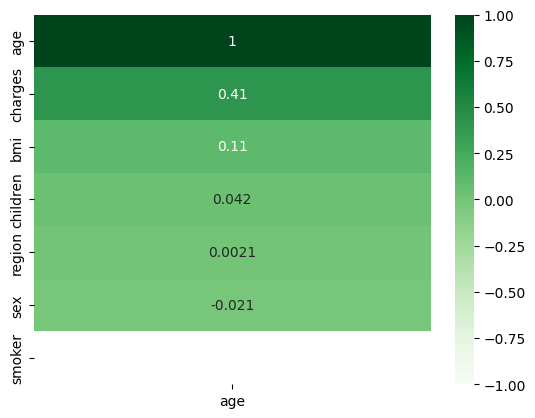

In [28]:
sns.heatmap(df.corr()[['age']].sort_values(by='age', ascending=False), vmin=-1, vmax=1, annot=True, cmap='Greens')


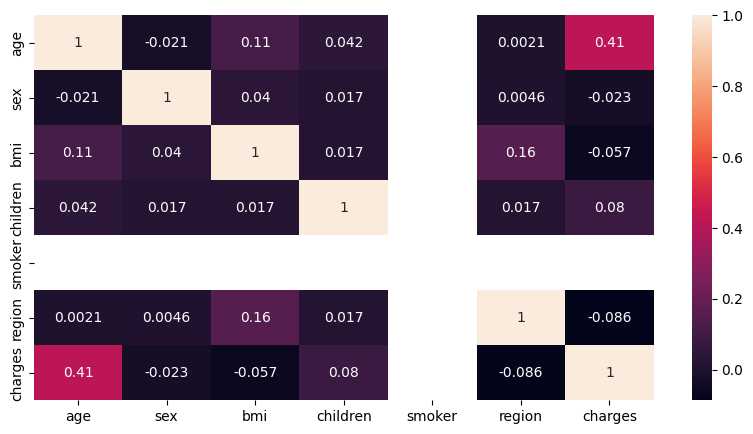

In [29]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   float64
 1   sex       1338 non-null   float64
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   float64
 4   smoker    1338 non-null   float64
 5   region    1338 non-null   float64
 6   charges   1338 non-null   float64
dtypes: float64(7)
memory usage: 73.3 KB


In [31]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [32]:
x=df[['charges']].values
y=df[['age']].values

In [33]:
sc=StandardScaler()

In [34]:
x=sc.fit_transform(x)



In [35]:
x

array([[ 1.01536984],
       [-1.19707681],
       [-0.79953363],
       ...,
       [-1.21104657],
       [-1.15586278],
       [ 2.80414526]])

In [36]:
models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'GradientBoostingRegressor':GradientBoostingRegressor(),
    'AdaBoostRegressor':AdaBoostRegressor(),
    'RandomForestRegressor':RandomForestRegressor(),
    'KneghborsRegressor':KNeighborsRegressor()
}

In [37]:
from sklearn.model_selection import cross_val_score


In [38]:
for name, model in models.items():
    scores=cross_val_score(model,x,y,scoring='neg_mean_squared_error',cv=10,n_jobs=-1)
    print('ss validaton model:{}'.format(name))
    rmse=np.sqrt(-scores)
    rmse_avarage=np.mean(rmse)
    print('AVARAGE RMSE:',rmse_avarage)
    print('*'*100)

ss validaton model:LinearRegression
AVARAGE RMSE: 12.80532143575179
****************************************************************************************************
ss validaton model:Lasso
AVARAGE RMSE: 12.846979730281973
****************************************************************************************************
ss validaton model:Ridge
AVARAGE RMSE: 12.805315951339661
****************************************************************************************************
ss validaton model:GradientBoostingRegressor
AVARAGE RMSE: 8.297916754134224
****************************************************************************************************
ss validaton model:AdaBoostRegressor
AVARAGE RMSE: 9.200998193362514
****************************************************************************************************
ss validaton model:RandomForestRegressor
AVARAGE RMSE: 9.12439493509893
*********************************************************************************************

In [39]:
gb=GradientBoostingRegressor()
ls=Lasso()

In [40]:
from sklearn.model_selection import train_test_split


In [41]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [42]:
gb.fit(x_train,y_train)

GradientBoostingRegressor()

In [43]:
print("model trained with {}".format(gb))
training_score = gb.score(x_train, y_train)*100
testing_score = gb.score(x_test, y_test)*100
score = r2_score(y_test, gb.predict(x_test))*100
mae = mean_absolute_error(y_test, gb.predict(x_test))
mse = mean_squared_error(y_test, gb.predict(x_test))
rmse = np.sqrt(mse)
print("r2score: ",score)
print("training_score: ", training_score)
print("testing_score: ", testing_score)
print("mae: ", mae)
print("mse: ", mse)
print("rmse_test: ", rmse)

model trained with GradientBoostingRegressor()
r2score:  61.8718209054528
training_score:  77.12587085609046
testing_score:  61.8718209054528
mae:  5.321241332269438
mse:  73.5268415610062
rmse_test:  8.574779388474447


In [44]:
y_pred = gb.predict(x)

In [45]:
OUTPUT = pd.DataFrame(zip(y,y_pred), columns=("ACTUAL", "PREDICTED"), dtype=float)
OUTPUT

,ACTUAL,PREDICTED
0,19.0,25.946781
1,18.0,19.298288
2,28.0,30.196478
3,33.0,41.427611
4,32.0,28.840842
...,...,...
1333,50.0,52.720137
1334,18.0,19.570295
1335,18.0,19.298288
1336,21.0,20.491076


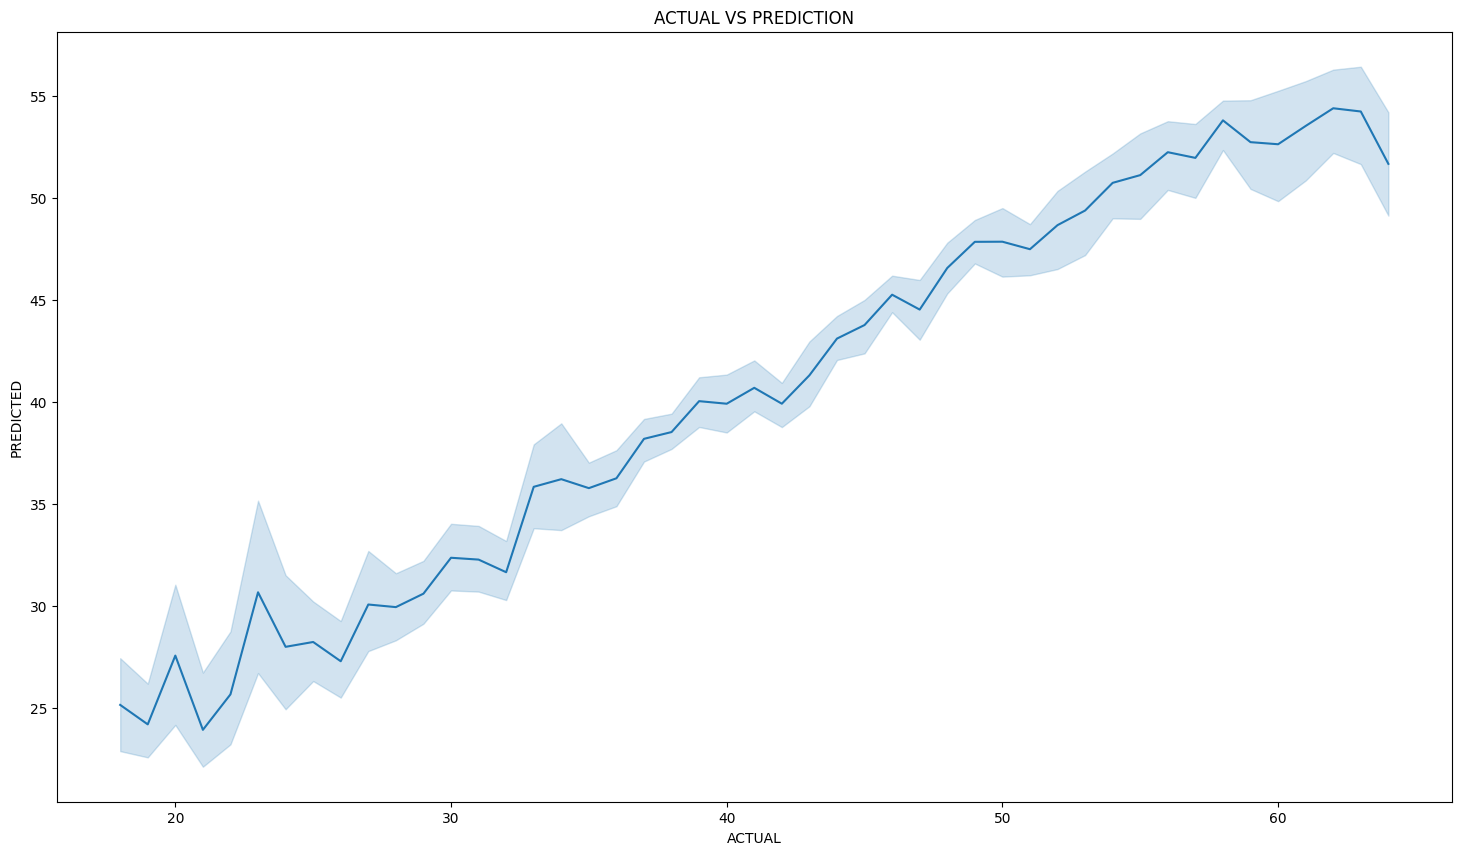

In [46]:
plt.figure(figsize=(18,10))
sns.lineplot(x='ACTUAL', y='PREDICTED', data=OUTPUT)
plt.title("ACTUAL VS PREDICTION")
plt.show()

In [47]:
gb.predict([[19.0]])

array([23.63417526])

In [48]:
user_input = input("Enter an integer value: ")

Enter an integer value: 35


In [49]:
gb.predict([[user_input]])

array([23.63417526])

In [50]:
user_input = input("Enter an integer value: ")
user_input_int = int(user_input)
print("Prediction:", gb.predict([[user_input_int]]))

Enter an integer value: 54
Prediction: [23.63417526]


In [51]:
gb.predict([[56.0]])

array([23.63417526])